In [1]:
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import fastreg.linear as frl
import fastreg.general as frg
import fastreg.testing as frt
from fastreg.formula import I, R, C

In [48]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

### Generate Data

In [24]:
models = ['linear', 'poisson', 'negbin', 'zinf_poisson', 'zinf_negbin']
data = frt.dataset(N=1_000_000, K1=10, K2=100, models=models, seed=89320432)
data.head()

,id1,id2,x1,x2,yhat0,yhat,yhat1,y0,y,Ep0,...,Ep1,p0,p,p1,pz0,pz,nb0,nb,nbz0,nbz
0,4,99,-0.232286,-1.106499,-0.633585,0.756415,-0.233585,1.997507,0.034401,0.530686,...,0.791690,1,3,3,1,0,1,1,1,1
1,8,98,0.457063,0.585081,0.588167,2.368167,1.388167,2.215314,2.489864,1.800685,...,4.007499,2,15,5,2,15,4,11,4,11
2,8,73,0.761536,-0.705039,-0.094563,1.435437,0.705437,0.518160,3.194336,0.909771,...,2.024732,1,8,0,1,0,2,5,0,0
3,8,40,-0.251006,-0.884939,-0.506265,0.693735,0.293735,-1.399765,0.015946,0.602743,...,1.341428,1,0,3,0,0,0,5,0,0
4,6,90,-1.211539,1.763510,0.794644,2.294644,1.394644,2.340393,2.163917,2.213653,...,4.033538,1,12,6,1,12,3,7,0,7


### Normal OLS

In [15]:
%time smf.ols('y0 ~ 1 + x1 + x2', data=data).fit().params

CPU times: user 434 ms, sys: 300 ms, total: 734 ms
Wall time: 184 ms


Intercept    0.099722
x1           0.299900
x2           0.600421
dtype: float64

In [16]:
%time frl.ols(y='y0', x=I+R('x1')+R('x2'), data=data)

CPU times: user 72.5 ms, sys: 36.2 ms, total: 109 ms
Wall time: 32.2 ms


y0,coeff,stderr,low95,high95,pvalue
1,0.099722,0.001000,0.097763,0.101681,0.0
x1,0.299900,0.000999,0.297941,0.301858,0.0
x2,0.600421,0.000998,0.598465,0.602378,0.0


### Sparse OLS

In [17]:
%time frl.ols(y='y', x=I+R('x1')+R('x2')+C('id1')+C('id2'), data=data)

CPU times: user 735 ms, sys: 38.1 ms, total: 773 ms
Wall time: 721 ms


y,coeff,stderr,low95,high95,pvalue
1,0.101112,0.010406,0.080716,0.121507,0.0
x1,0.300678,0.001000,0.298719,0.302637,0.0
x2,0.598699,0.000999,0.596742,0.600656,0.0
id1=1,0.095159,0.004474,0.086391,0.103927,0.0
id1=2,0.194404,0.004468,0.185646,0.203162,0.0
...,...,...,...,...,...
id2=95,0.952153,0.014125,0.924469,0.979838,0.0
id2=96,0.962016,0.014155,0.934273,0.989759,0.0
id2=97,0.990319,0.014161,0.962564,1.018074,0.0
id2=98,0.984403,0.014150,0.956671,1.012136,0.0


### Fancy OLS

In [18]:
%time frl.ols(y='y', x=I+R('x1')+R('x2'), absorb=('id1', 'id2'), data=data)

CPU times: user 801 ms, sys: 444 ms, total: 1.25 s
Wall time: 488 ms


y,coeff,stderr,low95,high95,pvalue
1,1.045036,0.000925,1.043223,1.046849,0.0
x1,0.300678,0.000990,0.298739,0.302618,0.0
x2,0.598699,0.000971,0.596796,0.600601,0.0


In [19]:
%time frl.ols(y='y', x=I+R('x1')+R('x2')+C('id1')+C('id2'), cluster=('id1', 'id2'), data=data)

CPU times: user 1.01 s, sys: 41.9 ms, total: 1.05 s
Wall time: 985 ms


y,coeff,stderr,low95,high95,pvalue
1,0.101112,0.008526,0.084401,0.117823,0.0
x1,0.300678,0.000990,0.298739,0.302618,0.0
x2,0.598699,0.000971,0.596796,0.600601,0.0
id1=1,0.095159,0.004021,0.087278,0.103040,0.0
id1=2,0.194404,0.004191,0.186191,0.202617,0.0
...,...,...,...,...,...
id2=95,0.952153,0.012445,0.927762,0.976545,0.0
id2=96,0.962016,0.010592,0.941256,0.982776,0.0
id2=97,0.990319,0.011683,0.967420,1.013218,0.0
id2=98,0.984403,0.010255,0.964304,1.004503,0.0


### Poisson

In [20]:
%time param, sigma = frg.poisson(y='p0', x=I+R('x1')+R('x2'), data=data, epochs=3)
print(param['real'])

[  0] -0.6623: 0.3373 nan
[  1] -0.6223: 0.3374 nan
[  2] -0.6223: 0.3374 nan
CPU times: user 1.87 s, sys: 276 ms, total: 2.15 s
Wall time: 1.53 s
[0.10007502 0.30764726 0.6043742 ]


In [21]:
%time param, sigma = frg.poisson(y='p', x=I+R('x1')+R('x2')+C('id1'), data=data, epochs=3)
print(param['real'])

[  0] 1.8925: 0.5160 0.4165
[  1] 2.3893: 0.5152 0.4159
[  2] 2.3893: 0.5151 0.4164
CPU times: user 3.47 s, sys: 451 ms, total: 3.92 s
Wall time: 2.74 s
[0.65652   0.2995286 0.5891753]


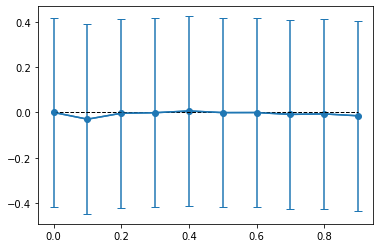

In [22]:
bid1 = np.arange(10)/10
beta = param['categ']['id1']-param['categ']['id1'][0]
berr = beta - bid1
stdv = np.sqrt(np.diagonal(sigma['categ']['id1']['categ']['id1']))
line, = plt.plot(bid1, berr, marker='o')
# plt.plot(bid1, bid1, linestyle='--', linewidth=1, color='k');
plt.plot(bid1, np.zeros_like(bid1), linestyle='--', linewidth=1, color='k');
plt.errorbar(bid1, berr, yerr=stdv, capsize=4, color=line.get_color());

### Negative Binomial

In [32]:
%time param, sigma = frg.zinf_negbin(y='nb0', x=I+R('x1')+R('x2'), data=data, epochs=10)
print(param['real'])

[  0] -0.7324: 0.3673 nan
[  1] -0.6073: 0.3546 nan
[  2] -0.5943: 0.3426 nan
[  3] -0.5927: 0.3371 nan
[  4] -0.5924: 0.3351 nan
[  5] -0.5924: 0.3341 nan
[  6] -0.5924: 0.3336 nan
[  7] -0.5924: 0.3332 nan
[  8] -0.5924: 0.3330 nan
[  9] -0.5924: 0.3328 nan
CPU times: user 12.1 s, sys: 1.62 s, total: 13.7 s
Wall time: 9.66 s
[0.09992301 0.30031046 0.59815097]


In [35]:
%time param, sigma = frg.zinf_negbin(y='nb', x=I+R('x1')+R('x2')+C('id1')+C('id2'), data=data, epochs=10)

[  0] 1.4729: 0.3768 0.3292
[  1] 1.7915: 0.3821 0.3200
[  2] 1.8366: 0.3867 0.3111
[  3] 1.8442: 0.3882 0.3061
[  4] 1.8456: 0.3889 0.3032
[  5] 1.8458: 0.3899 0.3013
[  6] 1.8458: 0.3908 0.2996
[  7] 1.8458: 0.3918 0.2980
[  8] 1.8458: 0.3928 0.2964
[  9] 1.8458: 0.3938 0.2948
CPU times: user 20.5 s, sys: 2.58 s, total: 23.1 s
Wall time: 18.1 s


<ipython-input-36-12031c8b75c1>:3: RuntimeWarning: invalid value encountered in sqrt
  stdv = np.sqrt(np.diagonal(sigma['categ']['id2']['categ']['id2']))
/home/doug/.local/lib/python3.9/site-packages/matplotlib/axes/_base.py:2283: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


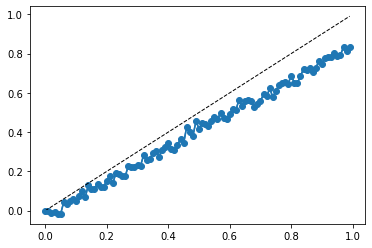

In [36]:
bid1 = np.arange(100)/100
beta = param['categ']['id2'] - param['categ']['id2'][0]
stdv = np.sqrt(np.diagonal(sigma['categ']['id2']['categ']['id2']))
line, = plt.plot(bid1, beta, marker='o')
plt.plot(bid1, bid1, linestyle='--', linewidth=1, color='k');
plt.errorbar(bid1, beta, yerr=stdv, capsize=4, color=line.get_color());

### Ultra Wide

In [38]:
N = 2_000_000
df = pd.DataFrame({ 
    'x1': np.random.rand(N), 
    'x2': np.random.rand(N), 
    'id1': np.ceil(np.arange(N)/200+1e-7).astype(int),
    'id2': np.random.randint(1, 10001, size=N)
})
df['y'] = df['x1'] + 2*df['x2'] + np.log10(df['id1']) + np.log10(df['id2']) + np.random.randn(N)

In [47]:
%time frl.ols(y='y', x=I+R('x1')+R('x2'), absorb=C('id1')*C('id2'), data=df)

CPU times: user 2.6 s, sys: 1.39 s, total: 3.99 s
Wall time: 3.21 s


y,coeff,stderr,low95,high95,pvalue
1,7.132834,0.001870,7.129168,7.136499,0.0
x1,0.998995,0.002448,0.994197,1.003793,0.0
x2,1.998739,0.002454,1.993930,2.003548,0.0


In [46]:
%time beta, sigma = frg.ols(y='y', x=I+R('x1')+R('x2')+C('id1')+C('id2'), data=df, epochs=10, stderr=False)
print(beta['real'])

[  0] -16.6229: 2.2732 0.6170
[  1] -1.9090: 3.3842 0.7752
[  2] -1.2006: 3.0342 0.7726
[  3] -1.1452: 3.0492 0.7180
[  4] -1.1365: 3.0947 0.6633
[  5] -1.1340: 3.1194 0.6094
[  6] -1.1229: 3.1615 0.5590
[  7] -1.1200: 3.1829 0.5088
[  8] -1.1102: 3.2142 0.4617
[  9] -1.1049: 3.2316 0.4157
CPU times: user 28.9 s, sys: 4.15 s, total: 33 s
Wall time: 23.5 s
[6.6544967 1.0176848 2.0225592]
